In [135]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd
import linearsolve as ls
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

[552917.15746155 531814.10150114 543931.04073746 542719.65968438
 564477.35500685 606746.59090483 499293.46533568 594601.51129531
 497702.29350725 583870.18459075 601793.70980848 562842.77159438
 557732.22289728 571807.82372824 520586.85963081 600170.63157224
 499626.87170682 568836.60156436 575696.07938051 534637.43670595
 529752.53490501 562925.68371748 476256.78747073 592312.22155181
 508877.24166886 607041.85184978 505579.4752695  508950.54261381
 572267.41876795 599522.63398583 455580.95974955 496495.56599448
 501539.26187559 568425.40734369 558720.39205534 577797.03987846
 528259.28587603 564344.05452646 523278.00913879 481822.26730772
 554038.32325261 501134.99176342 485882.47233829 499784.55041632
 513712.84460168 569423.99360162 515252.35868485 466836.71406918
 563419.37734383 593459.23188827 531546.29923941 589591.05133226
 541752.11038072 584146.79228052 564178.77311632 547597.42579959
 612937.3294142  499251.9615794  547801.97770481 516766.34723312
 601101.21894893 584026.4

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


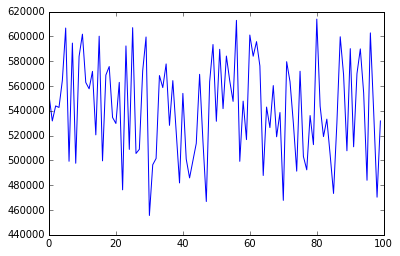

In [143]:
total=np.zeros(100)
for i in range(100):
    Total_House_Fund_Period = 30
    Total_Payment = 0
    Loan_Interest= np.zeros(Total_House_Fund_Period)
    Loan_Interest_per_month = np.zeros(Total_House_Fund_Period)
    Initial_Loan = 300000
    Follow_Loan = np.zeros(Total_House_Fund_Period)
    One_Year_Loan_Payment = np.zeros(Total_House_Fund_Period)
    One_Month_Loan_Payment = np.zeros(Total_House_Fund_Period)
    Loan_Interest[0]=0.045
    for t in range(Total_House_Fund_Period-1):
        Loan_Interest[t+1] = Loan_Interest[t] + np.random.choice([-0.01,-0.005,0,0.005,0.01],size=1,replace=True,p=[0.1,0.2,0.4,0.2,0.1])
        if Loan_Interest[t+1]>0.06:
            Loan_Interest[t+1]= Loan_Interest[t+1] + np.random.choice([-0.015,-0.01,-0.005],size=1,replace=True,p=[0.1,0.3,0.6])
        elif Loan_Interest[t+1]<0.02:
            Loan_Interest[t+1]= Loan_Interest[t+1] + np.random.choice([0.005,0.01,0.015],size=1,replace=True,p=[0.1,0.3,0.6])
        Loan_Interest_per_month[t] = Loan_Interest[t]/12
    for t in range(Total_House_Fund_Period):
        One_Month_Loan_Payment[t] = (Initial_Loan*(Loan_Interest[t]/12)*((1+(Loan_Interest[t]/12))**((Total_House_Fund_Period-t)*12))/((1+(Loan_Interest[t]/12))**((Total_House_Fund_Period-t)*12)-1))
        One_Year_Loan_Payment[t] =  One_Year_Loan_Payment[t]+One_Month_Loan_Payment[t]*12
        Initial_Loan = Initial_Loan*(1+ Loan_Interest_per_month[t])**12 - One_Month_Loan_Payment[t]*((1+Loan_Interest_per_month[t])**12-1)/Loan_Interest_per_month[t]
        Total_Payment=Total_Payment+One_Year_Loan_Payment[t]
    
    total[i]=Total_Payment

print(total)
print(total.mean())
plt.plot(total)



In [142]:
Initial_Loan = 300000
Loan_Interest=0.045
One_Month_Loan_Payment = (Initial_Loan*(Loan_Interest/12)*((1+(Loan_Interest/12))**(30*12))/((1+(Loan_Interest/12))**(30*12)-1))
Total_u = One_Month_Loan_Payment*30*12
print(Total_u)

547220.1346119567


In [138]:
#理论上可以做个p检验，但我好懒，不想做p检验了

In [148]:
t = (np.mean(total)-Total_u)/(np.std(total,ddof=1)/np.sqrt(len(total)))

ttest,pval = ttest_1samp(total,Total_u)
print(t,ttest)
if pval < 0.05:
	print("Reject the Null Hypothesis.")
else:
	print("Accept the Null Hypothesis.")


-1.1829932612826999 -1.1829932612826997
Accept the Null Hypothesis.


In [ ]:
#检验结果不出我的所料